In [1]:
#Analysis of Hollywood Movies#
#Imporing all Librarires#

import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_curve, precision_recall_curve, confusion_matrix
import plotly.express as px
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
# Read orginal dataset
df = pd.read_csv ('dataset.csv')

##### Data Preprocessing and Tidying ######

In [4]:
df.drop(['released', 'director', 'writer', 'star'], axis=1)

rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7659                                   The Robinsons    NaN     Action  2020   
7660                                    More to Life    NaN      Drama  2020   
7661                                     Dream Round    NaN     Comedy  2020   
7662                                    It's Just Us    NaN      Drama  2020   
7663                                       Tee em el    NaN     Horror  2020   

      score      votes         country      budget        gross  \
0       8.4   927000.0  United Kingdom  19000000.0   46998772.0   
1       5.8    65000.0   United States   4500000.0   58853106.0   
2       8.7  1200000.0   United States  18000000.0  538375067.0   
3       7.7   221000.0   United States   3500000.0   83453539.0   
4       7.3   108000.0   United States   6000000.0   12545800.0   
...     ...        ...             ...         ...          ...   
7659    NaN        NaN   United States     10000.0          NaN   
7660    3.1       18.0   United States      7000.0          NaN   
7661    4.7       36.0   United States         NaN          NaN   
7662    NaN        NaN   United States     15000.0          NaN   
7663    5.7        7.0    South Africa         NaN          NaN   

                        company  runtime  
0                  Warner Bros.    146.0  
1             Columbia Pictures    104.0  
2                     Lucasfilm    124.0  
3            Paramount Pictures     88.0  
4                Orion Pictures     98.0  
...                         ...      ...  
7659                        NaN     90.0  
7660                        NaN     90.0  
7661  Cactus Blue Entertainment     90.0  
7662                        NaN    120.0  
7663                PK 65 Films    102.0  

[7664 rows x 11 columns]

In [5]:
df['rating'].fillna(value = 'Not Rated', inplace = True)

In [6]:
df['rating'].isna().sum()

0

In [7]:
mean_budget = df[['company', 'budget']].groupby('company', as_index=False).mean()
mean_budget

company      budget
0         "DIA" Productions GmbH & Co. KG  36000000.0
1     "Weathering With You" Film Partners  11100000.0
2                         .406 Production    250000.0
3                      1+2 Seisaku Iinkai         NaN
4                         10 West Studios         NaN
...                                   ...         ...
2377                           i am OTHER   7000000.0
2378                             i5 Films   3000000.0
2379             iDeal Partners Film Fund         NaN
2380                          micro_scope   6800000.0
2381                              thefyzz   5300000.0

[2382 rows x 2 columns]

In [8]:
mean_budget_nan = mean_budget[mean_budget['budget'].isna()]

In [9]:
total_sum = 0

for _, row in mean_budget_nan.iterrows():
    company = row['company']
    rows = df[df['company'] == company][['  ', 'company', 'budget']]
    print(f"Company: {company}, num entries: {len(rows)}")
    total_sum += len(rows)

Company: 1+2 Seisaku Iinkai, num entries: 1
Company: 10 West Studios, num entries: 1
Company: 120 Films, num entries: 1
Company: 120dB Films, num entries: 2
Company: 13 Productions, num entries: 1
Company: 1992 Number Four Limited Partnership, num entries: 1
Company: 391 Productions, num entries: 2
Company: 3B Productions, num entries: 2
Company: 4 1/2 Film, num entries: 1
Company: 49th Parallel Productions, num entries: 1
Company: 4k Films, num entries: 1
Company: 7DM Studios, num entries: 1
Company: 8383 Productions, num entries: 1
Company: A Bigger Boat, num entries: 1
Company: A Hot Dog, num entries: 1
Company: A Lucky Old Sun Production, num entries: 1
Company: A.M.A. Film, num entries: 1
Company: ABC Animation, num entries: 1
Company: ABC Entertainment, num entries: 1
Company: ABC Productions, num entries: 1
Company: ABS-CBN Film Productions, num entries: 2
Company: ACCENT Films, num entries: 1
Company: ADHM Films, num entries: 1
Company: AOI Promotion, num entries: 1
Company: AR

Company: Cape of Good Films, num entries: 1
Company: Cargo Entertainment, num entries: 1
Company: Caroline Productions, num entries: 1
Company: Carson Productions, num entries: 1
Company: Cascade Films, num entries: 1
Company: Cat In The Mill Studio, num entries: 1
Company: Catalyst Global Media, num entries: 1
Company: Causeway Films, num entries: 1
Company: Centar Film, num entries: 1
Company: Central Motion Pictures, num entries: 1
Company: Centre national du cinéma et de l'image animée (CNC), num entries: 3
Company: Century Video Corporation, num entries: 1
Company: Chaiken Films, num entries: 1
Company: Channel 4 Television Corporation, num entries: 1
Company: Channel Four Film, num entries: 1
Company: Chaos Productions, num entries: 1
Company: Charlie Mopic, num entries: 1
Company: Chaz Productions, num entries: 1
Company: Cheap Date, num entries: 1
Company: Chestnut Hill Productions, num entries: 2
Company: Chongqing Film Group, num entries: 1
Company: Christel Films, num entrie

Company: Gainax, num entries: 1
Company: Gallery Films, num entries: 1
Company: Gamechanger Films, num entries: 1
Company: Gary Kurfirst Pictures, num entries: 1
Company: Gary Sherman Productions, num entries: 1
Company: Gato Negro Films, num entries: 1
Company: Gaumont International, num entries: 1
Company: Gaylord Productions, num entries: 1
Company: Geechee Girls, num entries: 1
Company: Geetha Arts, num entries: 1
Company: Gemini Films, num entries: 2
Company: Georgian-Film, num entries: 1
Company: Gibraltar Entertainment, num entries: 1
Company: Gilbert Films, num entries: 1
Company: Give Me Liberty, num entries: 1
Company: Glen Echo Entertainment, num entries: 1
Company: Gloria Sanchez Productions, num entries: 1
Company: Gold Pine Productions, num entries: 1
Company: Goldcrest Pictures, num entries: 1
Company: Goldwyn Films, num entries: 1
Company: Gomillion Studios, num entries: 1
Company: Good Dog Productions LLC, num entries: 1
Company: Good Film Company, num entries: 1
Compa

Company: Mirage Films, num entries: 1
Company: Mobra Films, num entries: 1
Company: Mockingbird Pictures, num entries: 1
Company: Modern Man Films, num entries: 1
Company: Monarchy Enterprises B.V., num entries: 1
Company: Monogatari, num entries: 1
Company: Moonlight Film, num entries: 1
Company: Moonstone Entertainment, num entries: 1
Company: Morison Film Group, num entries: 1
Company: Mott Street Pictures, num entries: 1
Company: Movie Partners, num entries: 1
Company: Moviola Film och Television AB, num entries: 1
Company: Mrs. White's Productions, num entries: 1
Company: NBC Film, num entries: 2
Company: NEO Motion Pictures, num entries: 1
Company: NH Studioz, num entries: 1
Company: National Broadcasting Company (NBC), num entries: 1
Company: National Film Board of Canada (NFB), num entries: 1
Company: National Film Trustee Company, num entries: 1
Company: Neverending Media, num entries: 2
Company: New Artists Alliance, num entries: 1
Company: New Century Entertainment, num entr

Company: Typhoon, num entries: 1
Company: Téléma, num entries: 1
Company: UAA Films, num entries: 1
Company: UTV Motion Pictures, num entries: 1
Company: UTV Spotboy, num entries: 1
Company: UV Creations, num entries: 1
Company: Ulrich Seidl Film Produktion GmbH, num entries: 1
Company: Underdog Productions, num entries: 1
Company: Union Générale Cinématographique (UGC), num entries: 2
Company: United British Artists (UBA), num entries: 1
Company: United Channel Movies, num entries: 1
Company: Unity Pictures, num entries: 1
Company: Varahonar Company, num entries: 1
Company: Vega Film, num entries: 1
Company: Viacom Enterprises, num entries: 1
Company: Vinod Chopra Productions, num entries: 1
Company: Virgin, num entries: 2
Company: Virgin Vision, num entries: 2
Company: Vision International, num entries: 1
Company: Visual Arts Entertainment, num entries: 1
Company: WW Production, num entries: 1
Company: Warp Films, num entries: 3
Company: Warp X, num entries: 3
Company: Ways & Means, 

In [10]:
df = df[df['company'].notna()]

In [11]:
df.shape

(7647, 15)

In [12]:
from tqdm.notebook import tqdm

tqdm.pandas()


def fill_na_budget(row):
    company = row['company']
    return mean_budget[mean_budget['company'] == company]['budget'].tolist()[0]

df['budget_imputed'] = df.progress_apply(lambda row: fill_na_budget(row), axis=1)

  0%|          | 0/7647 [00:00<?, ?it/s]

In [13]:
df = df[df['budget_imputed'].notna()]

In [14]:
df.shape

(6651, 16)

In [15]:
mean_votes = df['votes'].mean()
mean_votes

98601.67147797324

In [16]:
def fill_gross(row):
    votes = row['votes']
    budget = row['budget_imputed']
    gross_empty = row['gross']
    if type(gross_empty) == float:
        if mean_votes < votes:
            budget += (0.25*budget)
        else:
            budget -= (0.25*budget)
        return budget
    return gross_empty
    
df['gross_imputed'] = df.progress_apply(lambda row: fill_gross(row), axis=1)

  0%|          | 0/6651 [00:00<?, ?it/s]

In [17]:
df = pd.read_csv ('cleaned_data.csv')

In [18]:
#covert object to category for perfroming label encoding.

df.dtypes
df["rating"] = df["rating"].astype('category')
df["genre"] = df["genre"].astype('category')
df["country"] = df["country"].astype('category')

In [19]:
df.dtypes

name                 object
rating             category
genre              category
year                  int64
score               float64
votes                 int64
country            category
budget              float64
gross               float64
company              object
runtime               int64
budget_imputed      float64
gross_imputed       float64
rating_encoded        int64
genre_encoded         int64
country_encoded       int64
diff                float64
Success_or_not        int64
dtype: object

In [20]:
df["rating_encoded"] = df["rating"].cat.codes
df["genre_encoded"] = df["genre"].cat.codes
df["country_encoded"] = df["country"].cat.codes

In [21]:
df["diff"]=df["gross_imputed"]-df["budget_imputed"]


In [22]:
def categorise(row):  
    if row['diff'] > 0 and row['votes']>=mean_votes :
        return 1  #hit
    else:
        return 0 #not hit
   

In [23]:
df['Success_or_not'] = df.apply(lambda row: categorise(row), axis=1)

In [24]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

   score    votes         country      budget        gross  \
0    8.4   927000  United Kingdom  19000000.0   46998772.0   
1    5.8    65000   United States   4500000.0   58853106.0   
2    8.7  1200000   United States  18000000.0  538375067.0   
3    7.7   221000   United States   3500000.0   83453539.0   
4    7.3   108000   United States   6000000.0   12545800.0   

              company  runtime  budget_imputed  gross_imputed  rating_encoded  \
0        Warner Bros.      146      19000000.0     46998772.0               6   
1   Columbia Pictures      104       4500000.0     58853106.0               6   
2           Lucasfilm      124      18000000.0    538375067.0               4   
3  Paramount Pictures       88       3500000.0     83453539.0               4   
4      Orion Pictures       98       6000000.0     12545800.0               6   

   genre_encoded  country_encoded         diff  Success_or_not  
0              6               50   27998772.0               1  
1              1               51   54353106.0               0  
2              0               51  520375067.0               1  
3              4               51   79953539.0               1  
4              4               51    6545800.0               1

In [25]:
c_cols = df.drop('name', axis=1).dtypes[df.dtypes == 'object'].index.tolist()
f_cols = df.drop('name', axis=1).dtypes[df.dtypes == 'float64'].index.tolist()
i_cols = df.drop('name', axis=1).dtypes[df.dtypes == 'int64'].index.tolist()
n_cols = f_cols + i_cols
b = [x for x in n_cols if len(df[x].unique()) == 2]
num_not_binary = [x for x in n_cols if x not in b]

<ipython-input-26-eef386efa876>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


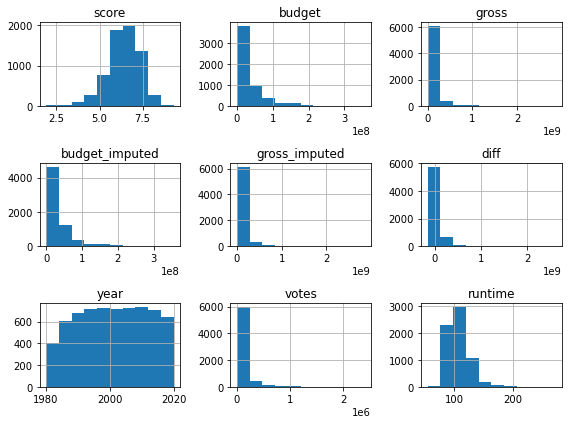

In [26]:
fig, axList = plt.subplots(3, 3, sharex=False, sharey=False)
axList = axList.flatten()
fig.set_size_inches(8, 6)


for i,ax in enumerate(axList[0:len(num_not_binary)]):
    df.hist(column = num_not_binary[i], bins = 10, ax=ax)     
fig.tight_layout()
fig.show()

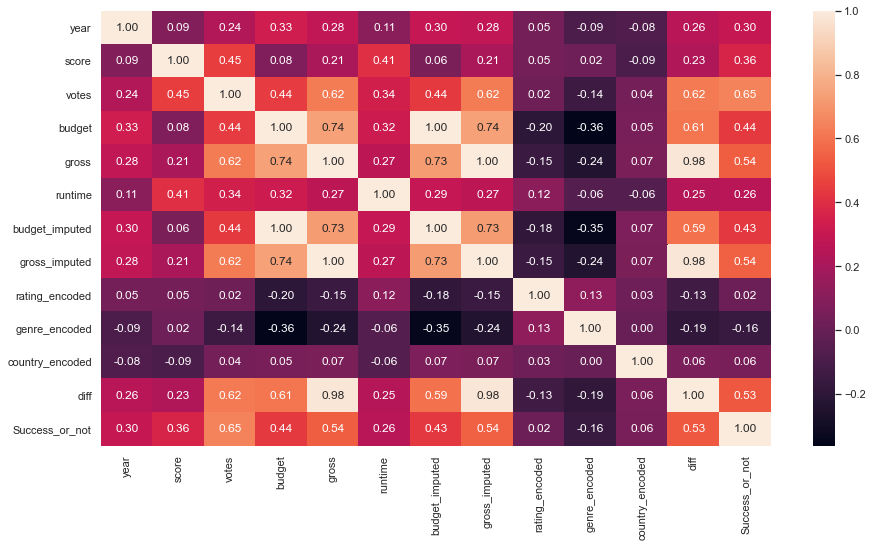

In [27]:
#heatmap
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.heatmap(data=df.corr(), annot=True, fmt= '.2f')

<Figure size 2880x2880 with 0 Axes>

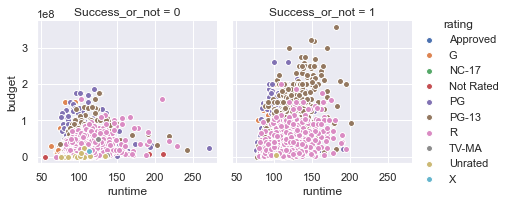

In [28]:
#scatter plot
fig = plt.figure(figsize = (40, 40))
graph = sns.FacetGrid(df, col ="Success_or_not",  hue ="rating")
graph.map(plt.scatter, "runtime", "budget", edgecolor ="w").add_legend()

plt.show()

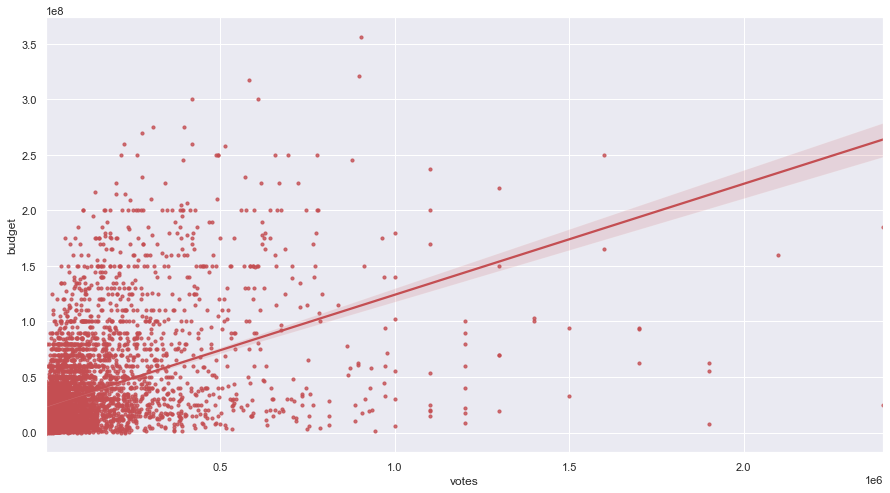

In [29]:
#scatter plot
a_plot = sns.regplot(x="votes",
                     y="budget", 
                     data=df, color="r", ci = 68, scatter_kws={"s": 10})


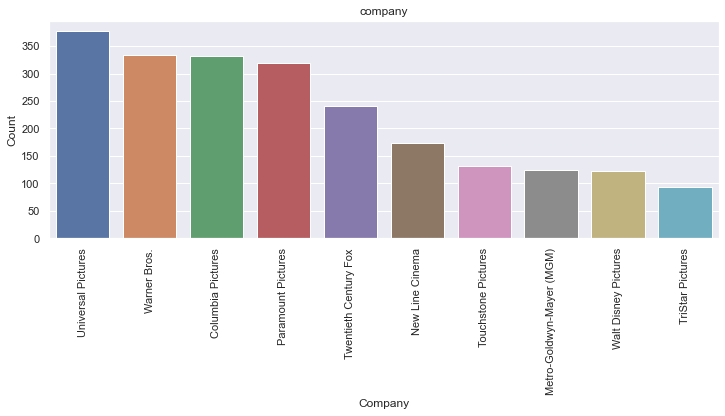

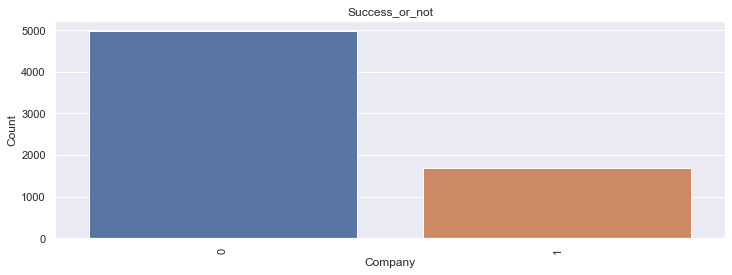

In [30]:
#bar plot
for i in c_cols + b:
    plt.figure(figsize = (12,4))
    sns.barplot(x = df[i].value_counts().index[0:10], 
                y = df[i].value_counts()[0:10]).set_title(i)
    plt.xlabel("Company")
    plt.ylabel("Count")
    plt.xticks(rotation='vertical')
    plt.show()

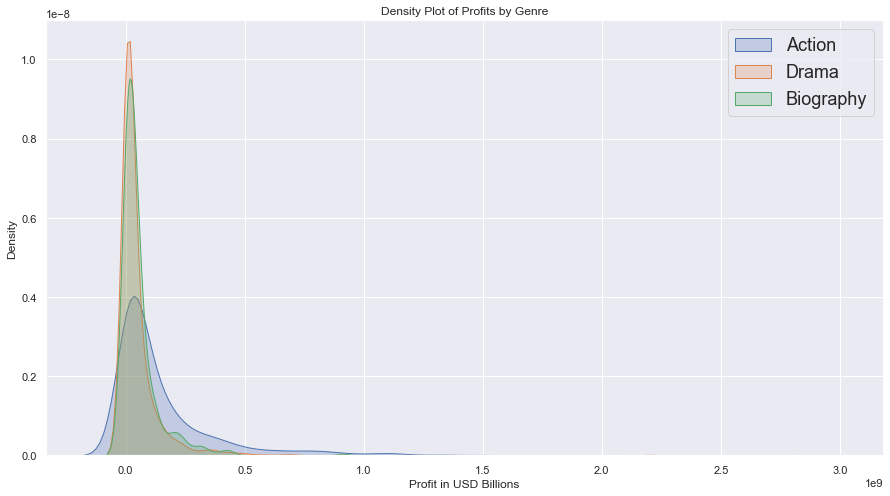

In [31]:
#density plot
sns.kdeplot(df.loc[df['genre'] == 'Action', 'gross'], label = 'Action', shade = True)
sns.kdeplot(df.loc[df['genre'] == 'Drama', 'gross'], label = 'Drama', shade = True)
sns.kdeplot(df.loc[df['genre'] == 'Biography', 'gross'], label = 'Biography', shade = True)

plt.xlabel('Profit in USD Billions'); plt.ylabel('Density'); plt.title('Density Plot of Profits by Genre');plt.legend(fontsize=18);

In [32]:
#box plot
fig=px.histogram(df, x='year', color='Success_or_not', 
                 opacity=0.7, barmode='overlay', 
                 histnorm='probability density', marginal='box',
                 width=800, height=500,
                 labels={
                     "success": "Movie Success",
                     "year": "Year of release"
                 },
                 title="The change in Movie Success through the years")
fig.show()

#### DATA MODELING ####

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
df_m=df[["year","score","votes","runtime","budget_imputed","gross_imputed","rating_encoded","genre_encoded","country_encoded","Success_or_not"]]
df_m

year  score    votes  runtime  budget_imputed  gross_imputed  \
0     1980    8.4   927000      146      19000000.0     46998772.0   
1     1980    5.8    65000      104       4500000.0     58853106.0   
2     1980    8.7  1200000      124      18000000.0    538375067.0   
3     1980    7.7   221000       88       3500000.0     83453539.0   
4     1980    7.3   108000       98       6000000.0     12545800.0   
...    ...    ...      ...      ...             ...            ...   
6646  2020    5.6    53000      101     175000000.0    245487753.0   
6647  2020    6.8    42000      100     135000000.0    111105497.0   
6648  2020    6.8     3700      149      80000000.0    461421559.0   
6649  2020    5.7      165       85        370000.0       277500.0   
6650  2020    6.6       35       78          5000.0         3750.0   

      rating_encoded  genre_encoded  country_encoded  Success_or_not  
0                  6              6               50               1  
1                  6              1               51               0  
2                  4              0               51               1  
3                  4              4               51               1  
4                  6              4               51               1  
...              ...            ...              ...             ...  
6646               4              1               51               0  
6647               4              1                6               0  
6648               3              0                8               0  
6649               3             13               51               0  
6650               6              6               51               0  

[6651 rows x 10 columns]

In [36]:
X=df_m.iloc[:,:-1] #features
y=df_m.iloc[:,-1]  #target

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y, test_size=0.2,random_state=0)

In [38]:
from sklearn.linear_model import LogisticRegression

### Logistic Regression ###

In [39]:

logreg = LogisticRegression()

In [40]:
# fit the model with data
logreg.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_pred=logreg.predict(x_test)

array([[731, 258],
       [ 62, 280]], dtype=int64)

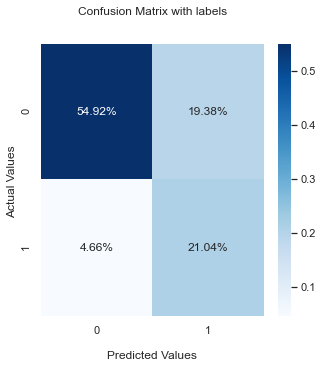

In [42]:
#confusion matrix
from sklearn import metrics
cnf_matrix_lr = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(cnf_matrix_lr/np.sum(cnf_matrix_lr), annot=True, cmap='Blues',fmt = '.2%')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
cnf_matrix_lr

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7595792637114951
Precision: 0.5204460966542751
Recall: 0.8187134502923976
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       989
           1       0.52      0.82      0.64       342

    accuracy                           0.76      1331
   macro avg       0.72      0.78      0.73      1331
weighted avg       0.82      0.76      0.77      1331



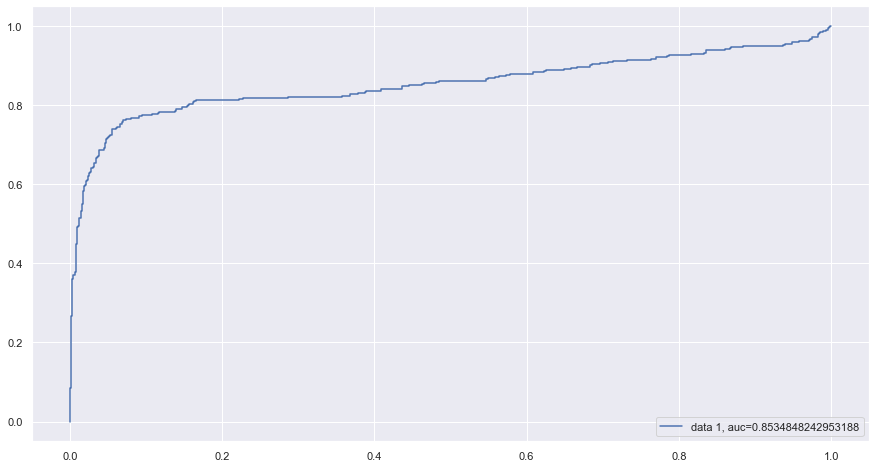

In [44]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [45]:
 ### Decision Tree ###

In [46]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [47]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred_dt = clf.predict(x_test)

In [48]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Precision:",metrics.precision_score(y_test, y_pred_dt))
print("Recall:",metrics.recall_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.9924868519909842
Precision: 0.9853801169590644
Recall: 0.9853801169590644
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       989
           1       0.99      0.99      0.99       342

    accuracy                           0.99      1331
   macro avg       0.99      0.99      0.99      1331
weighted avg       0.99      0.99      0.99      1331



In [49]:
feature_cols = ["year","score","votes","runtime","budget_imputed","gross_imputed","rating_encoded","genre_encoded","country_encoded"]

array([[984,   5],
       [  5, 337]], dtype=int64)

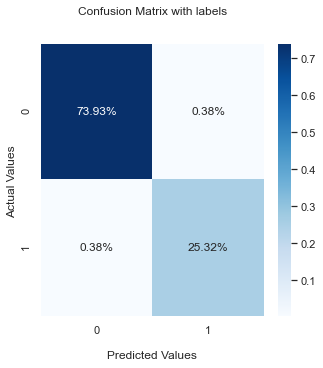

In [50]:
#confusion matrix
cnf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(cnf_matrix_dt/np.sum(cnf_matrix_dt), annot=True, cmap='Blues',fmt = '.2%')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
cnf_matrix_dt

In [51]:
from six import StringIO

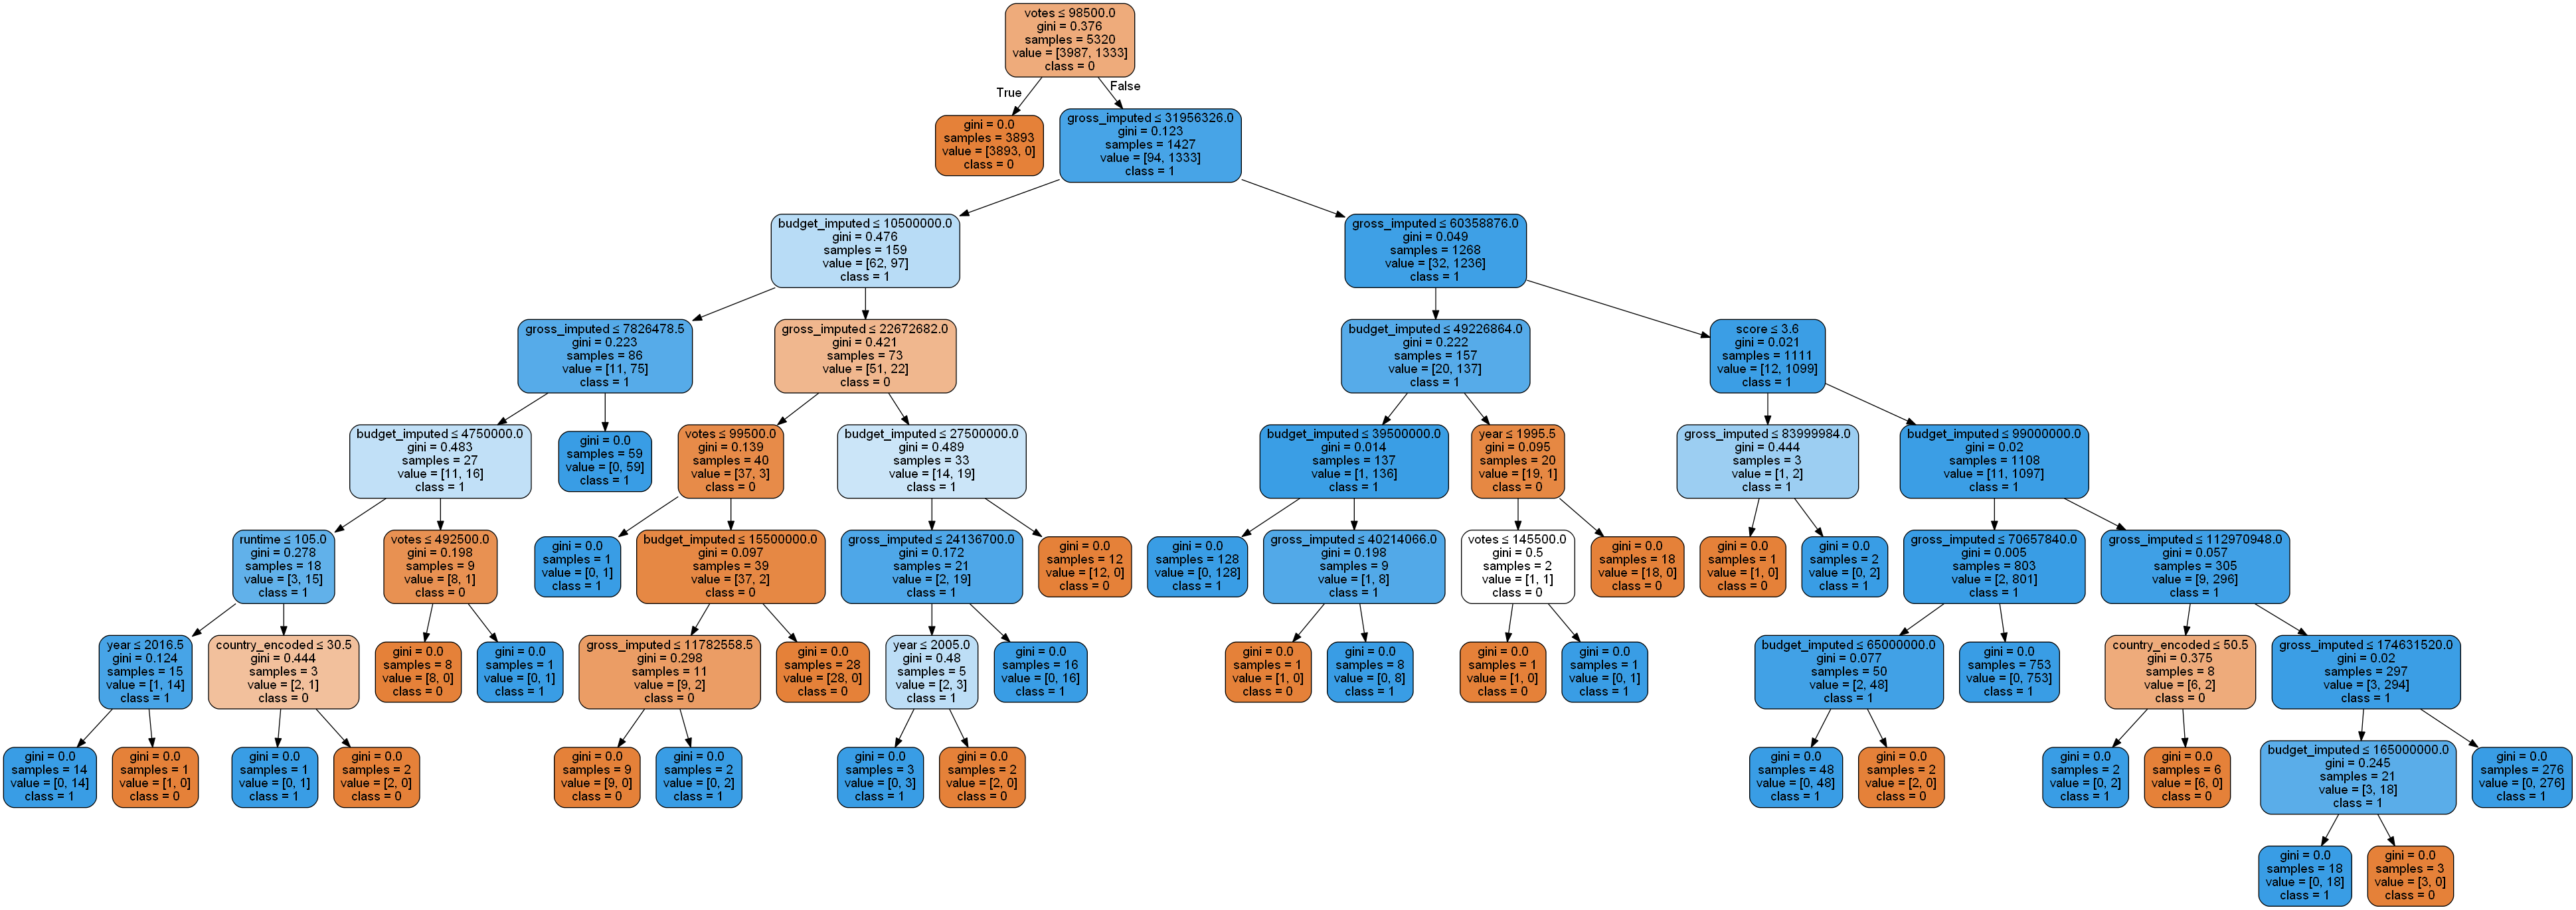

In [52]:
from sklearn.tree import export_graphviz
 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

### K-Nearest Neighour ###

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=17)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [56]:
y_pred_knn = classifier.predict(x_test)

array([[912,  77],
       [128, 214]], dtype=int64)

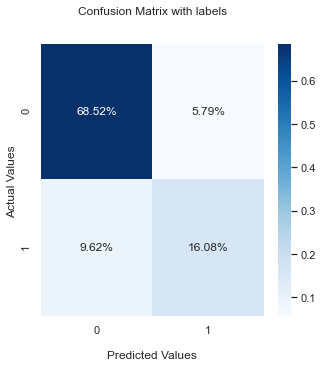

In [57]:
#confusion matrix
from sklearn import metrics
cnf_matrix_knn = metrics.confusion_matrix(y_test, y_pred_knn)
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(cnf_matrix_knn/np.sum(cnf_matrix_knn), annot=True, cmap='Blues',fmt = '.2%')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
cnf_matrix_knn

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:",metrics.precision_score(y_test, y_pred_knn))
print("Recall:",metrics.recall_score(y_test, y_pred_knn))

[[912  77]
 [128 214]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       989
           1       0.74      0.63      0.68       342

    accuracy                           0.85      1331
   macro avg       0.81      0.77      0.79      1331
weighted avg       0.84      0.85      0.84      1331

Accuracy: 0.8459804658151766
Precision: 0.7353951890034365
Recall: 0.6257309941520468


In [59]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

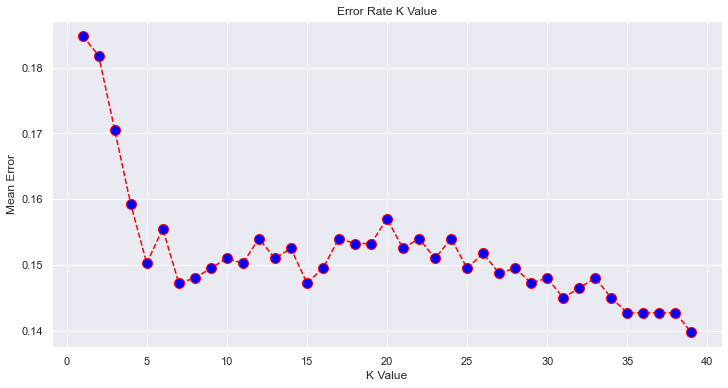

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### Random Forest ###

In [62]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred_rf=clf.predict(x_test)

Accuracy: 0.9924868519909842
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       989
           1       0.97      1.00      0.99       342

    accuracy                           0.99      1331
   macro avg       0.99      0.99      0.99      1331
weighted avg       0.99      0.99      0.99      1331

[[980   9]
 [  1 341]]


Text(21.5, 0.5, 'Actual Values ')

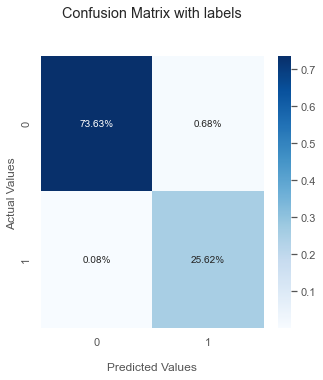

In [70]:
#confusion matrix
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
from sklearn import metrics
cnf_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(cnf_matrix_rf/np.sum(cnf_matrix_rf), annot=True, cmap='Blues',fmt = '.2%')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

In [64]:
plt.style.use('ggplot')
import matplotlib
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

## Feature Importance ##

In [65]:
clf_features = pd.DataFrame({'Features': df_m.drop(['Success_or_not'],axis =1).columns, 'Feature_importance_Score': clf.feature_importances_}).sort_values(by = ['Feature_importance_Score'],ascending = False,ignore_index  = True)
clf_features

Features  Feature_importance_Score
0            votes                  0.609652
1    gross_imputed                  0.242718
2   budget_imputed                  0.047496
3            score                  0.046101
4             year                  0.020285
5          runtime                  0.015423
6    genre_encoded                  0.008051
7   rating_encoded                  0.006241
8  country_encoded                  0.004033

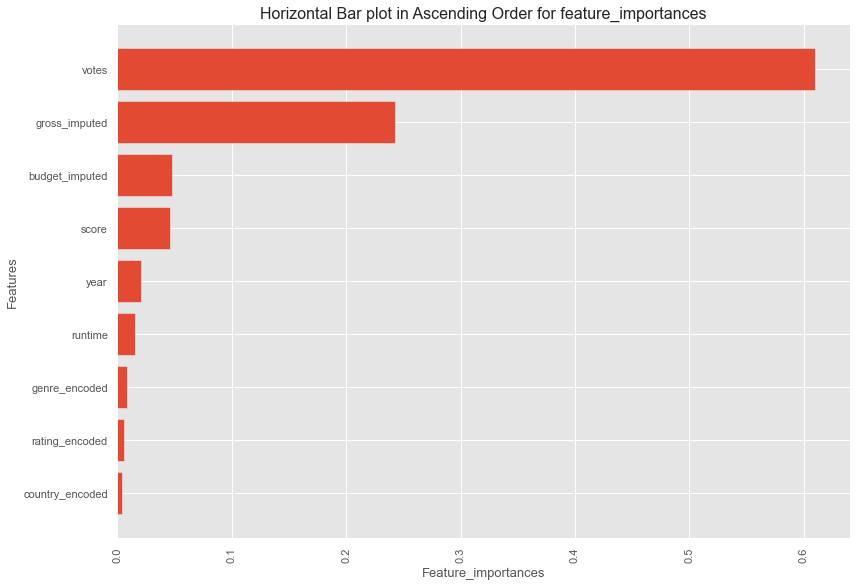

In [66]:
###Horizontal Bar
fig,ax = plt.subplots()
plt.barh('Features', 'Feature_importance_Score',data=clf_features)
plt.xlabel("Feature_importances", size=13)
plt.ylabel("Features", size=13)
plt.xticks(rotation=90)
ax.invert_yaxis()
fig.tight_layout()
plt.title("Horizontal Bar plot in Ascending Order for feature_importances", size=16)
plt.show()

C:\Users\nidhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution Plot')

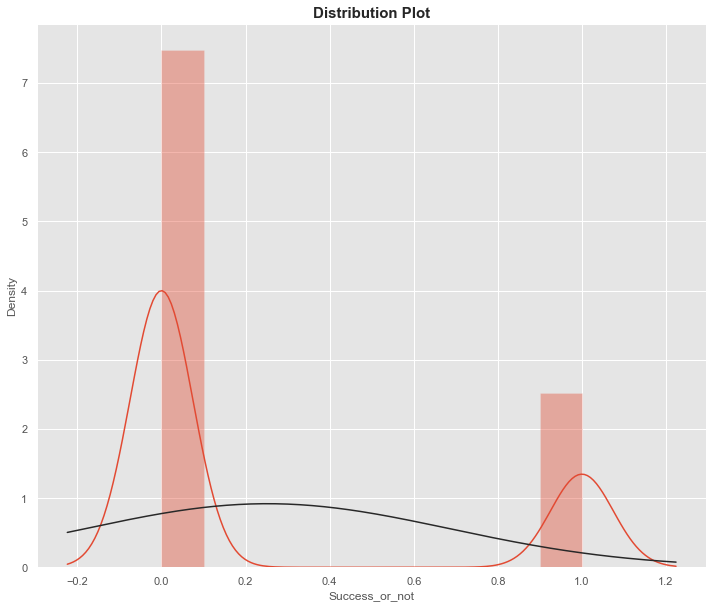

In [67]:
#density plot
plt.figure(figsize=(12,10))
sns.distplot(df_m['Success_or_not'], fit=norm)
plt.title("Distribution Plot",size=15, weight='bold')